In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

from sklearn.preprocessing import OrdinalEncoder

In [19]:
monkeypox = pd.read_csv('Monkeypox.csv')
monkeypox.head()

,Patient_ID,Systemic Illness,Rectal Pain,Sore Throat,Penile Oedema,Oral Lesions,Solitary Lesion,Swollen Tonsils,HIV Infection,Sexually Transmitted Infection,MonkeyPox
0,P0,None,False,True,True,True,False,True,False,False,Negative
1,P1,Fever,True,False,True,True,False,False,True,False,Positive
2,P2,Fever,False,True,True,False,False,False,True,False,Positive
3,P3,None,True,False,False,False,True,True,True,False,Positive
4,P4,Swollen Lymph Nodes,True,True,True,False,False,True,True,False,Positive


## Cleaning dataset

#### Checking what kind of data we have

In [20]:
monkeypox.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 11 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Patient_ID                      25000 non-null  object
 1   Systemic Illness                25000 non-null  object
 2   Rectal Pain                     25000 non-null  bool  
 3   Sore Throat                     25000 non-null  bool  
 4   Penile Oedema                   25000 non-null  bool  
 5   Oral Lesions                    25000 non-null  bool  
 6   Solitary Lesion                 25000 non-null  bool  
 7   Swollen Tonsils                 25000 non-null  bool  
 8   HIV Infection                   25000 non-null  bool  
 9   Sexually Transmitted Infection  25000 non-null  bool  
 10  MonkeyPox                       25000 non-null  object
dtypes: bool(8), object(3)
memory usage: 781.4+ KB


In [21]:
monkeypox.describe()

,Patient_ID,Systemic Illness,Rectal Pain,Sore Throat,Penile Oedema,Oral Lesions,Solitary Lesion,Swollen Tonsils,HIV Infection,Sexually Transmitted Infection,MonkeyPox
count,25000,25000,25000,25000,25000,25000,25000,25000,25000,25000,25000
unique,25000,4,2,2,2,2,2,2,2,2,2
top,P0,Fever,False,True,True,False,True,True,True,False,Positive
freq,1,6382,12655,12554,12612,12514,12527,12533,12584,12554,15909


#### Lowercase column names and data and replace " " with "_"

In [27]:
monkeypox.columns = monkeypox.columns.str.lower().str.replace(" ", "_")

In [28]:
objColumns = monkeypox.select_dtypes(object).columns
boolColumns = monkeypox.select_dtypes(bool).columns

for col in objColumns:
    monkeypox[col] = monkeypox[col].str.lower().str.replace(" ", "_")

monkeypox.head()

,patient_id,systemic_illness,rectal_pain,sore_throat,penile_oedema,oral_lesions,solitary_lesion,swollen_tonsils,hiv_infection,sexually_transmitted_infection,monkeypox
0,p0,none,False,True,True,True,False,True,False,False,negative
1,p1,fever,True,False,True,True,False,False,True,False,positive
2,p2,fever,False,True,True,False,False,False,True,False,positive
3,p3,none,True,False,False,False,True,True,True,False,positive
4,p4,swollen_lymph_nodes,True,True,True,False,False,True,True,False,positive


In [29]:
objColumns

Index(['patient_id', 'systemic_illness', 'monkeypox'], dtype='object')

In [30]:
df = monkeypox.copy()

In [32]:
ordEncoder = OrdinalEncoder()
df["systemic_illness_ord"] = ordEncoder.fit_transform(df[["systemic_illness"]])
df["monkeypox_ord"] = ordEncoder.fit_transform(df[["monkeypox"]])
df[boolColumns] = df[boolColumns].astype(int)
df.head()

,patient_id,systemic_illness,rectal_pain,sore_throat,penile_oedema,oral_lesions,solitary_lesion,swollen_tonsils,hiv_infection,sexually_transmitted_infection,monkeypox,systemic_illness_ord,monkeypox_ord
0,p0,none,0,1,1,1,0,1,0,0,negative,2.0,0.0
1,p1,fever,1,0,1,1,0,0,1,0,positive,0.0,1.0
2,p2,fever,0,1,1,0,0,0,1,0,positive,0.0,1.0
3,p3,none,1,0,0,0,1,1,1,0,positive,2.0,1.0
4,p4,swollen_lymph_nodes,1,1,1,0,0,1,1,0,positive,3.0,1.0


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 13 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   patient_id                      25000 non-null  object 
 1   systemic_illness                25000 non-null  object 
 2   rectal_pain                     25000 non-null  int32  
 3   sore_throat                     25000 non-null  int32  
 4   penile_oedema                   25000 non-null  int32  
 5   oral_lesions                    25000 non-null  int32  
 6   solitary_lesion                 25000 non-null  int32  
 7   swollen_tonsils                 25000 non-null  int32  
 8   hiv_infection                   25000 non-null  int32  
 9   sexually_transmitted_infection  25000 non-null  int32  
 10  monkeypox                       25000 non-null  object 
 11  systemic_illness_ord            25000 non-null  float64
 12  monkeypox_ord                   

## EDA

#### Checking feature values distribution.  The target class "monkeypox" is imbalanced.

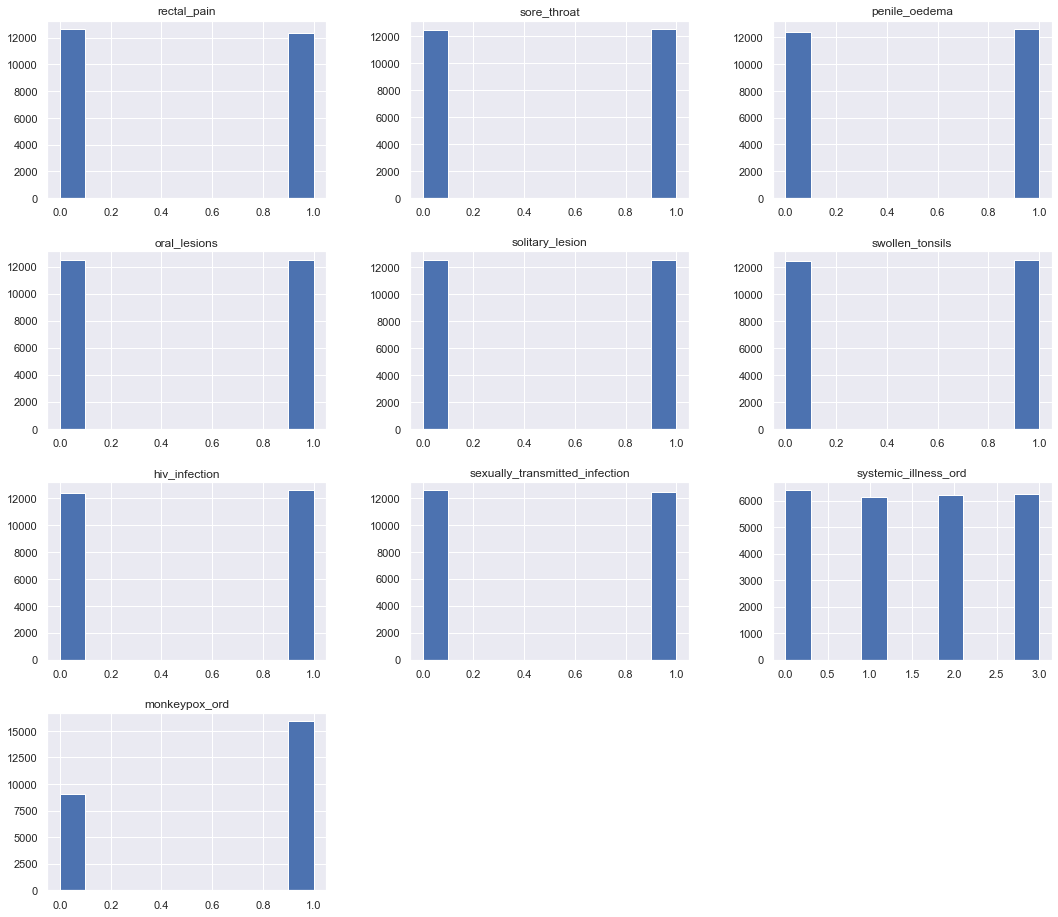

In [34]:
_ = df.hist(figsize=(18,16))

#### Let's check the correlation

<AxesSubplot:>

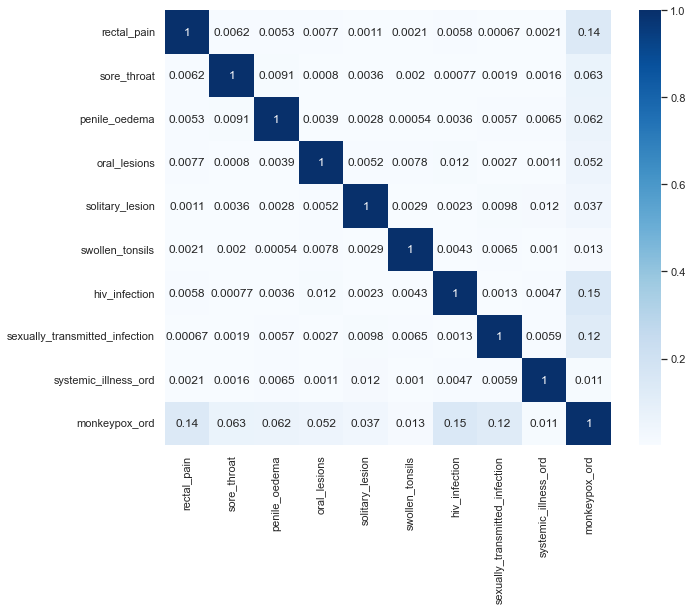

In [76]:
correlation = df.corr().abs()
plt.figure(figsize=(10,8))
sns.heatmap(correlation, cmap="Blues", annot=True)

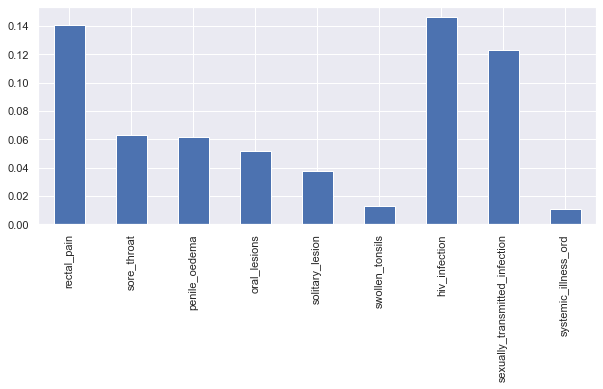

In [81]:
correlation = df.drop(columns='monkeypox_ord').corrwith(df.monkeypox_ord).abs()
plt.figure(figsize=(10,4))
_ = correlation.plot(kind='bar', grid=True)

Some features seem not to be correlated with the target.  In thiscase we will leave all the features to analize influence of all of them.

#### Converting data to 1's and 0's 

In [ ]:
ordEncoder = OrdinalEncoder()
df["systemic illness2"] = ordEncoder.fit_transform(df["systemic illness"])
df["monkeypox2"] = ordEncoder.fit_transform(df["monkeypox"])
df[["systemic illness", "monkeypox","systemic illness2", "monkeypox2"]].head(11)

In [ ]:
df.hist()

#### Checking missing values <>  Zero missing values

In [ ]:
monkeypox.isnull().sum()

In [44]:
df.monkeypox_ord

0        0.0
1        1.0
2        1.0
3        1.0
4        1.0
        ... 
24995    1.0
24996    1.0
24997    1.0
24998    0.0
24999    1.0
Name: monkeypox_ord, Length: 25000, dtype: float64